In [1]:
!pip install efficientnet_pytorch

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=13c37cbbd8e84a2fd1ab0bccce9c5d23611c1338369b9fbca81c13ac9c130d5a
  Stored in directory: /home/featurize/.cache/pip/wheels/2f/4b/15/ea907673e74a47c246beb10dce84ca1e846f34ae07740e147c
Successfully built efficientnet-pytorch


In [2]:
from __future__ import print_function, division
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

In [3]:
valid_dir = './data/train_valid/valid'
valid_transforms = transforms.Compose([transforms.Resize(256),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transforms)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=20, shuffle=False)

In [4]:
def test(model_ft, valid_loader, criterion, use_gpu):
    test_loss = 0.0
    num_correct = 0
    num_total = 0
    model_ft.eval()  
    for i, (inputs, labels) in enumerate(valid_loader):
        if use_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()
        # Feed Forward
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)   # Test Loss
        test_loss = test_loss + ((1 / (i + 1)) * (loss.data - test_loss))

        _, prediction = torch.max(outputs.data, 1)
        num_total += labels.size(0)
        num_correct += torch.sum(prediction == labels.data).item()

    test_acc = 100 * num_correct / num_total
    print("Test Loss: {:.3f} | Test Accuracy: {:6.3f}%".format(test_loss, test_acc))

In [5]:
def imshow(axis, inp):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    axis.imshow(inp)

In [6]:
def visualize(valid_loader, model_ft, row, col, num_images):
    count = 0
    fig = plt.figure(1, figsize=(16, 16))
    grid = ImageGrid(fig, 111, nrows_ncols=(row, col), axes_pad=0.05)
    for i, (inputs, labels) in enumerate(valid_loader):
        outputs = model_ft(inputs.to("cuda"))
        _, preds = torch.max(outputs.data, 1)

        for j in range(inputs.size()[0]):
            ax = grid[count]
            imshow(ax, inputs.cpu().data[j])
            ax.text(10, 210, '{}/{}'.format(preds[j], labels.data[j]), 
                    color='k', backgroundcolor='w', alpha=0.8)
            count += 1
            if count == num_images:
                return

In [6]:
# Test the ResNet50
use_gpu = torch.cuda.is_available()
criterion = nn.CrossEntropyLoss()
model_ft = torch.load("./ResNet50/ResNet50_savedModel.pth")
test(model_ft, valid_loader, criterion, use_gpu)

Test Loss: 0.452 | Test Accuracy: 86.595%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

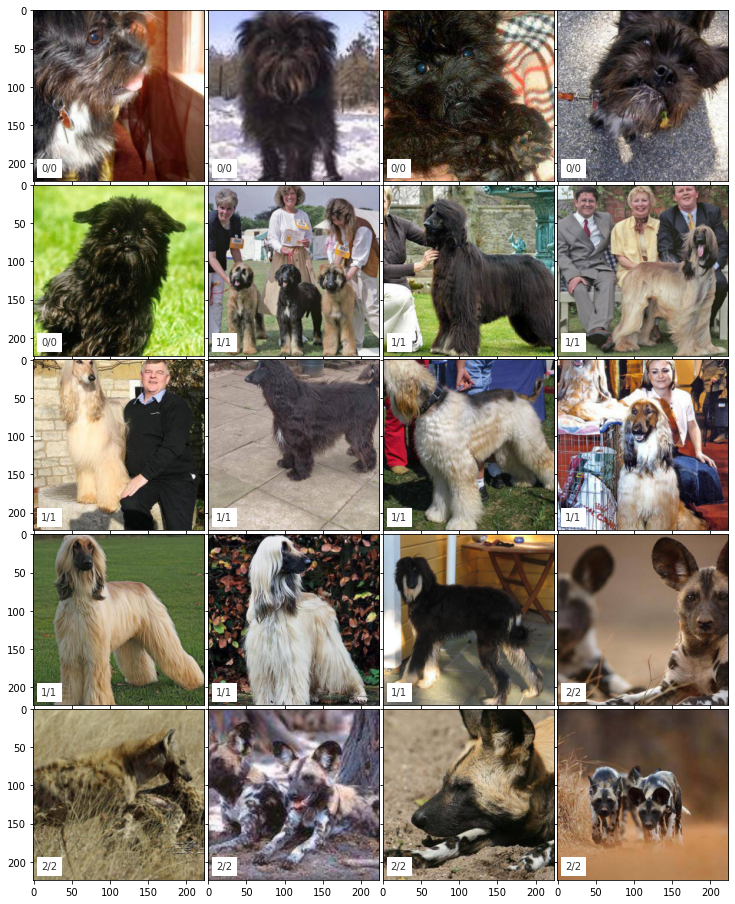

In [7]:
# Visualize the performance of the ResNet50
visualize(valid_loader, model_ft, 5, 4, 20)

In [7]:
# Test the EfficientNet
use_gpu = torch.cuda.is_available()
criterion = nn.CrossEntropyLoss()
model_ft = torch.load("./EfficientNet_b4/EfficientNet_savedModel.pth")
test(model_ft, valid_loader, criterion, use_gpu)

Test Loss: 0.719 | Test Accuracy: 81.115%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

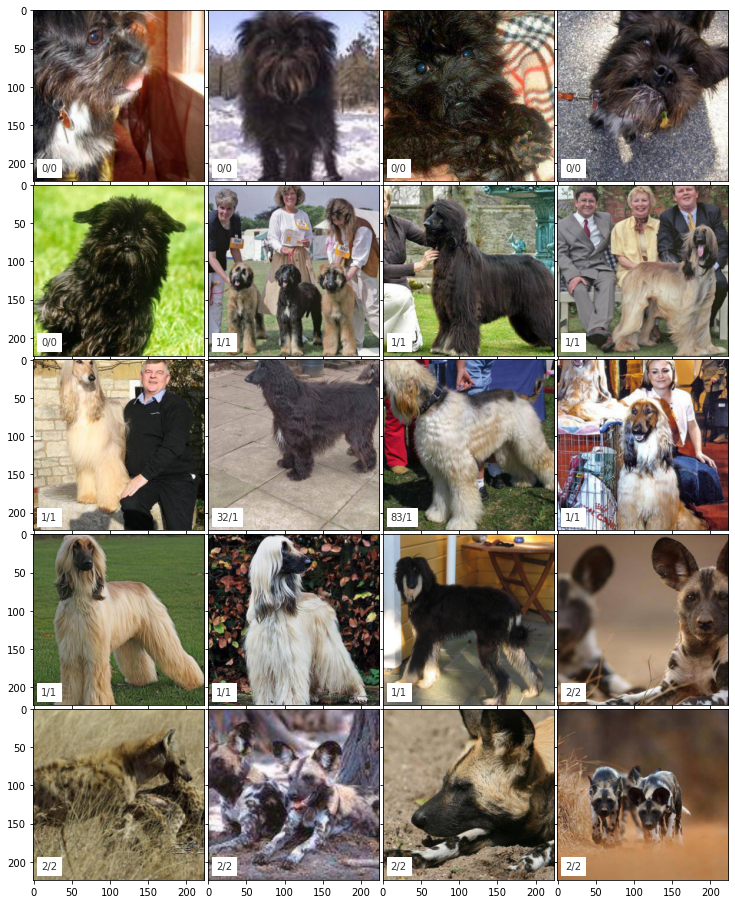

In [8]:
# Visualize the performance of the EfficientNet
visualize(valid_loader, model_ft, 5, 4, 20)

In [7]:
# Test the DenseNet169
use_gpu = torch.cuda.is_available()
criterion = nn.CrossEntropyLoss()
model_ft = torch.load("./DenseNet169/DenseNet169_savedModel.pth")
test(model_ft, valid_loader, criterion, use_gpu)

Test Loss: 1.251 | Test Accuracy: 68.787%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

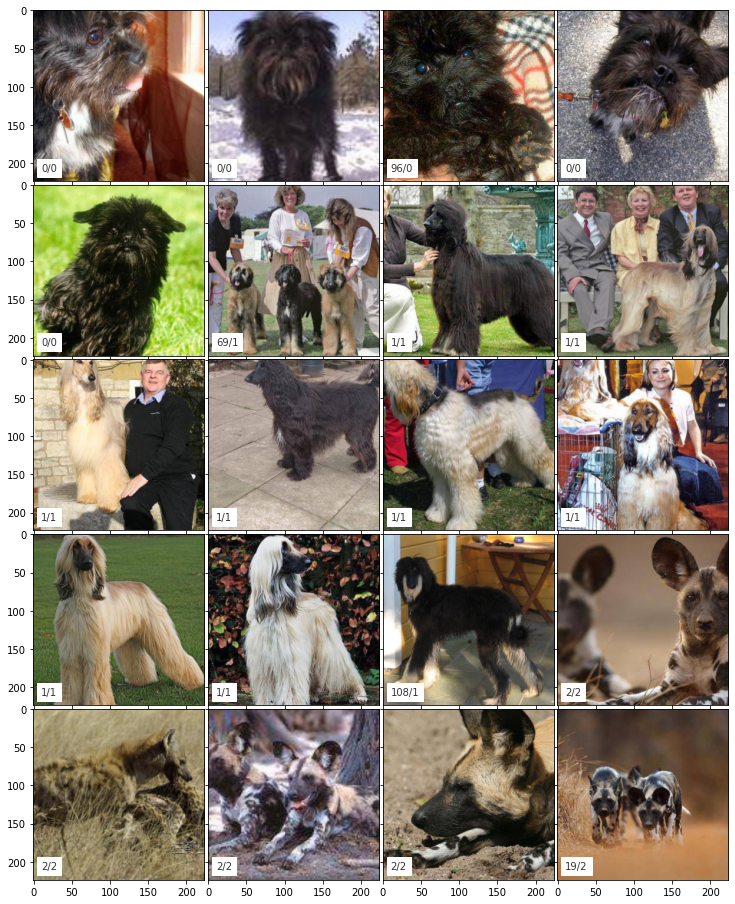

In [8]:
# Visualize the performance of the DenseNet169
visualize(valid_loader, model_ft, 5, 4, 20)